<a href="https://colab.research.google.com/github/rubanak/DevOps-training/blob/master/Hackathon_rubana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# dataframe backup
import copy 

# Perform PRe-processing (label encoding, imputing missing values) and Standardization
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
#from scipy.stats import zscore

# Composite Feature
from sklearn.decomposition import PCA

# to split Train and Test data
from sklearn.model_selection import train_test_split

In [ ]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

import math

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the plot style. 
sns.set_style(style='darkgrid')  
sns.set(style="darkgrid", color_codes=True)

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (2 marks)

In [ ]:
#### Set the working directory path where the dataset is stored in Google drive ####
project_path = '/content/drive/My Drive/AIML/Hackathon/'

In [ ]:
import os
os.chdir(project_path)
!ls

 result.xlsx  'Test Data.zip'  'Test Zip'  'Train Data.zip'  'Train Data Zip'


This shows the folders and the files stored in the working path. The following input dataset and weights file are stored in th projct path,
1. Train Data.zip
2. Test Data.zip

In [ ]:
### Set the working directory path where the dataset is stored in Google drive ####
train_path = '/content/drive/My Drive/AIML/Hackathon/Train Data Zip'
test_path  = '/content/drive/My Drive/AIML/Hackathon/Test Zip'

In [ ]:
os.chdir(train_path)
!ls

frequency_domain_features_train.csv	  time_domain_features_train.csv
heart_rate_non_linear_features_train.csv


Load the train datasets

In [ ]:
freq_df = pd.read_csv("frequency_domain_features_train.csv")
hearate_df = pd.read_csv("heart_rate_non_linear_features_train.csv")
time_df = pd.read_csv("time_domain_features_train.csv")

Load the train datasets

In [ ]:
os.chdir(test_path)
!ls

frequency_domain_features_test.csv	 time_domain_features_test.csv
heart_rate_non_linear_features_test.csv


In [ ]:
test_freq_df = pd.read_csv("frequency_domain_features_test.csv")
test_hearate_df = pd.read_csv("heart_rate_non_linear_features_test.csv")
test_time_df = pd.read_csv("time_domain_features_test.csv")

In [ ]:
print("Train frequency = ", freq_df.shape, ", Train heart rate = ", hearate_df.shape, ", Train_time rate = ",time_df.shape)
print("Test frequency = ",  test_freq_df.shape, ", Test heart rate = ", test_hearate_df.shape, ", Test_time rate = ",test_time_df.shape)

Train frequency =  (369289, 12) , Train heart rate =  (369289, 7) , Train_time rate =  (369289, 20)
Test frequency =  (41033, 12) , Test heart rate =  (41033, 7) , Test_time rate =  (41033, 19)


## Merge Train and Test Data to single file

### Train Data

In [ ]:
temp_train_df = pd.merge(freq_df, hearate_df, on = "uuid", how = "inner") 

In [ ]:
consolidated_train_df = pd.merge(temp_train_df, time_df, on = "uuid", how = "inner") 

In [ ]:
consolidated_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

### Test Data

In [ ]:
temp_test_df = pd.merge(test_freq_df, test_hearate_df, on = "uuid", how = "inner")
consolidated_test_df = pd.merge(temp_test_df, test_time_df, on = "uuid", how = "inner") 


In [ ]:
consolidated_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               41033 non-null  object 
 1   VLF                41033 non-null  float64
 2   VLF_PCT            41033 non-null  float64
 3   LF                 41033 non-null  float64
 4   LF_PCT             41033 non-null  float64
 5   LF_NU              41033 non-null  float64
 6   HF                 41033 non-null  float64
 7   HF_PCT             41033 non-null  float64
 8   HF_NU              41033 non-null  float64
 9   TP                 41033 non-null  float64
 10  LF_HF              41033 non-null  float64
 11  HF_LF              41033 non-null  float64
 12  SD1                41033 non-null  float64
 13  SD2                41033 non-null  float64
 14  sampen             41033 non-null  float64
 15  higuci             41033 non-null  float64
 16  datasetId          410

In [ ]:
print("Consolidated Train Data = ", consolidated_train_df.shape) 
print("Consolidated Test Data  = ", consolidated_test_df.shape) 

Consolidated Train Data =  (369289, 37)
Consolidated Test Data  =  (41033, 36)


## Backup the consolidated data - Train and Test

In [ ]:
# copy and keep the original dataset
con_train_bkup_df = copy.deepcopy(consolidated_train_df)
con_test_bkup_df = copy.deepcopy(consolidated_test_df)

In [ ]:
print("Backup Consolidated Train Data = ", con_train_bkup_df.shape) 
print("Backup Consolidated Test Data  = ", con_test_bkup_df.shape) 

Backup Consolidated Train Data =  (369289, 37)
Backup Consolidated Test Data  =  (41033, 36)


## Train Data preparation

In [ ]:
train_df = copy.deepcopy(consolidated_train_df)
test_df = copy.deepcopy(consolidated_test_df)
print("Train Data = ", train_df.shape, ", Test Data  = ", test_df.shape) 

Train Data =  (369289, 37) , Test Data  =  (41033, 36)


In [ ]:
train_df = train_df.drop(columns = ['datasetId']) 
train_df.shape

(369289, 36)

In [ ]:
train_df = train_df.drop(columns = ['uuid']) 
train_df.shape

(369289, 35)

### Move the target variable to end of column

In [ ]:
HR = train_df['HR']

In [ ]:
HR.head()

0    69.499952
1    64.363150
2    67.450066
3    68.809562
4    74.565728
Name: HR, dtype: float64

In [ ]:
train_df.drop(labels=['HR'], axis=1, inplace = True)

In [ ]:
train_df.shape

(369289, 34)

Here, HR column is dropped

In [ ]:
train_df.insert(34, 'HR', HR)
train_df.shape

(369289, 35)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  float64
 15  condition          369289 non-null  object 
 16  ME

### Handling Categorical variable

In [ ]:
train_df['condition']=train_df['condition'].astype('category')

In [ ]:
train_df['condition'].unique()

['no stress', 'interruption', 'time pressure']
Categories (3, object): ['no stress', 'interruption', 'time pressure']

In [ ]:
class_label_encoder = LabelEncoder()

train_df['condition'] = class_label_encoder.fit_transform(train_df['condition'])
train_df.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,HR
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,1,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,69.499952
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,0,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,64.363150
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,0,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,67.450066
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,1,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,68.809562
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,1,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,74.565728


In [ ]:
train_df.groupby('condition').size()

condition
0    105150
1    200082
2     64057
dtype: int64

In [ ]:
train_df.iloc[:, :-1].describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


### Analysis of Data distribution

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  float64
 15  condition          369289 non-null  int64  
 16  ME

Handle categorical variable

In [ ]:
print(f'Skewness of Concrete dataset \n{train_df.iloc[:, :-1].skew()}')

Skewness of Concrete dataset 
VLF                  1.960735
VLF_PCT             -0.410836
LF                   1.349076
LF_PCT               0.425164
LF_NU               -1.645603
HF                   2.476530
HF_PCT               2.021882
HF_NU                1.645603
TP                   1.452435
LF_HF                9.781091
HF_LF                2.159372
SD1                  0.399668
SD2                  2.363386
sampen              -3.091012
higuci               0.335008
condition            0.130775
MEAN_RR              0.648000
MEDIAN_RR            0.925513
SDRR                 2.363789
RMSSD                0.399529
SDSD                 0.399668
SDRR_RMSSD           3.707939
pNN25                1.203114
pNN50                1.264137
KURT                 5.722209
SKEW                 1.223005
MEAN_REL_RR          0.112796
MEDIAN_REL_RR       -0.948009
SDRR_REL_RR          0.869543
RMSSD_REL_RR         1.258784
SDSD_REL_RR          1.258784
SDRR_RMSSD_REL_RR    0.838587
KURT_REL_R

Skewness: Represents the shape of the distribution \ Skewness = 0 for normal disttribution skewness = 0. \ 
Skewness > 0 for distribution skewed toward positive of the mean 
Skewness < 0 for distribution skewed toward negative of the mean. 

In [ ]:
print(f'Kurtosis of Concrete dataset \n{train_df.iloc[:, :-1].kurtosis()}')

Kurtosis of Concrete dataset 
VLF                    4.493563
VLF_PCT               -0.520971
LF                     1.739223
LF_PCT                -0.489052
LF_NU                  3.852707
HF                     7.961637
HF_PCT                 5.517449
HF_NU                  3.852707
TP                     2.813712
LF_HF                133.475215
HF_LF                  7.293165
SD1                   -0.559551
SD2                    6.374008
sampen                12.790417
higuci                -0.278843
condition             -0.774849
MEAN_RR                0.434382
MEDIAN_RR              2.645933
SDRR                   6.380031
RMSSD                 -0.559819
SDSD                  -0.559551
SDRR_RMSSD            21.348857
pNN25                  0.849793
pNN50                  1.025275
KURT                  85.184693
SKEW                   3.487345
MEAN_REL_RR            5.215669
MEDIAN_REL_RR          1.269521
SDRR_REL_RR            0.186433
RMSSD_REL_RR           1.434218
SDSD_REL_R

LF_HF - Ratio of LF to HF
1.   LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
2.   HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)

KURT - Kurtosis of distribution of successive RR intervals

KURT_REL_RR - Kurtosis of distribution of relative RR intervals

SDRR_RMSSD - Ratio of SDRR / RMSSD
1.   SDRR - Standard deviation of RR intervals
2.   RMSSD - Root mean square of successive RR interval differences





Kurtosis: Kurtosis is measure of tail. It tells whether the distribution is heavy tailed (with outliers) or light tailed. It indicated tail extends +/- 3 std deviation from mean.

Kurtosis > 3 - Leptokurtic or heavy-tailed distribution \ Kurtosis = 3 - Mesokurtic (kurtosis same as the normal distribution) \ kurtosis < 3 - Platykurtic or short-tailed distribution \

In [ ]:
train_df.iloc[:, :-1].var()

VLF                  3.297033e+06
VLF_PCT              2.813954e+02
LF                   3.296732e+05
LF_PCT               2.572909e+02
LF_NU                1.700214e+01
HF                   2.061057e+03
HF_PCT               3.101377e+00
HF_NU                1.700214e+01
TP                   3.698803e+06
LF_HF                1.302164e+05
HF_LF                2.424399e-03
SD1                  8.496031e+00
SD2                  1.191814e+04
sampen               4.284859e-02
higuci               3.867871e-03
condition            4.458156e-01
MEAN_RR              1.552615e+04
MEDIAN_RR            1.750885e+04
SDRR                 5.947035e+03
RMSSD                1.698071e+01
SDSD                 1.698073e+01
SDRR_RMSSD           2.645903e+01
pNN25                6.716743e+01
pNN50                9.804741e-01
KURT                 3.205348e+00
SKEW                 4.893306e-01
MEAN_REL_RR          2.657734e-08
MEDIAN_REL_RR        7.527228e-07
SDRR_REL_RR          2.975340e-05
RMSSD_REL_RR  

VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)

LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)

MEAN_REL_RR - Mean of relative RR intervals

MEDIAN_REL_RR - Median of relative RR intervals

SDRR_REL_RR - Standard deviation of relative RR intervals

RMSSD_REL_RR - Root mean square of successive relative RR interval differences

SDSD_REL_RR - Standard deviation of successive relative RR interval differences

MEAN_REL_RR - Mean of relative RR intervals

LF_HF - Ratio of LF to HF

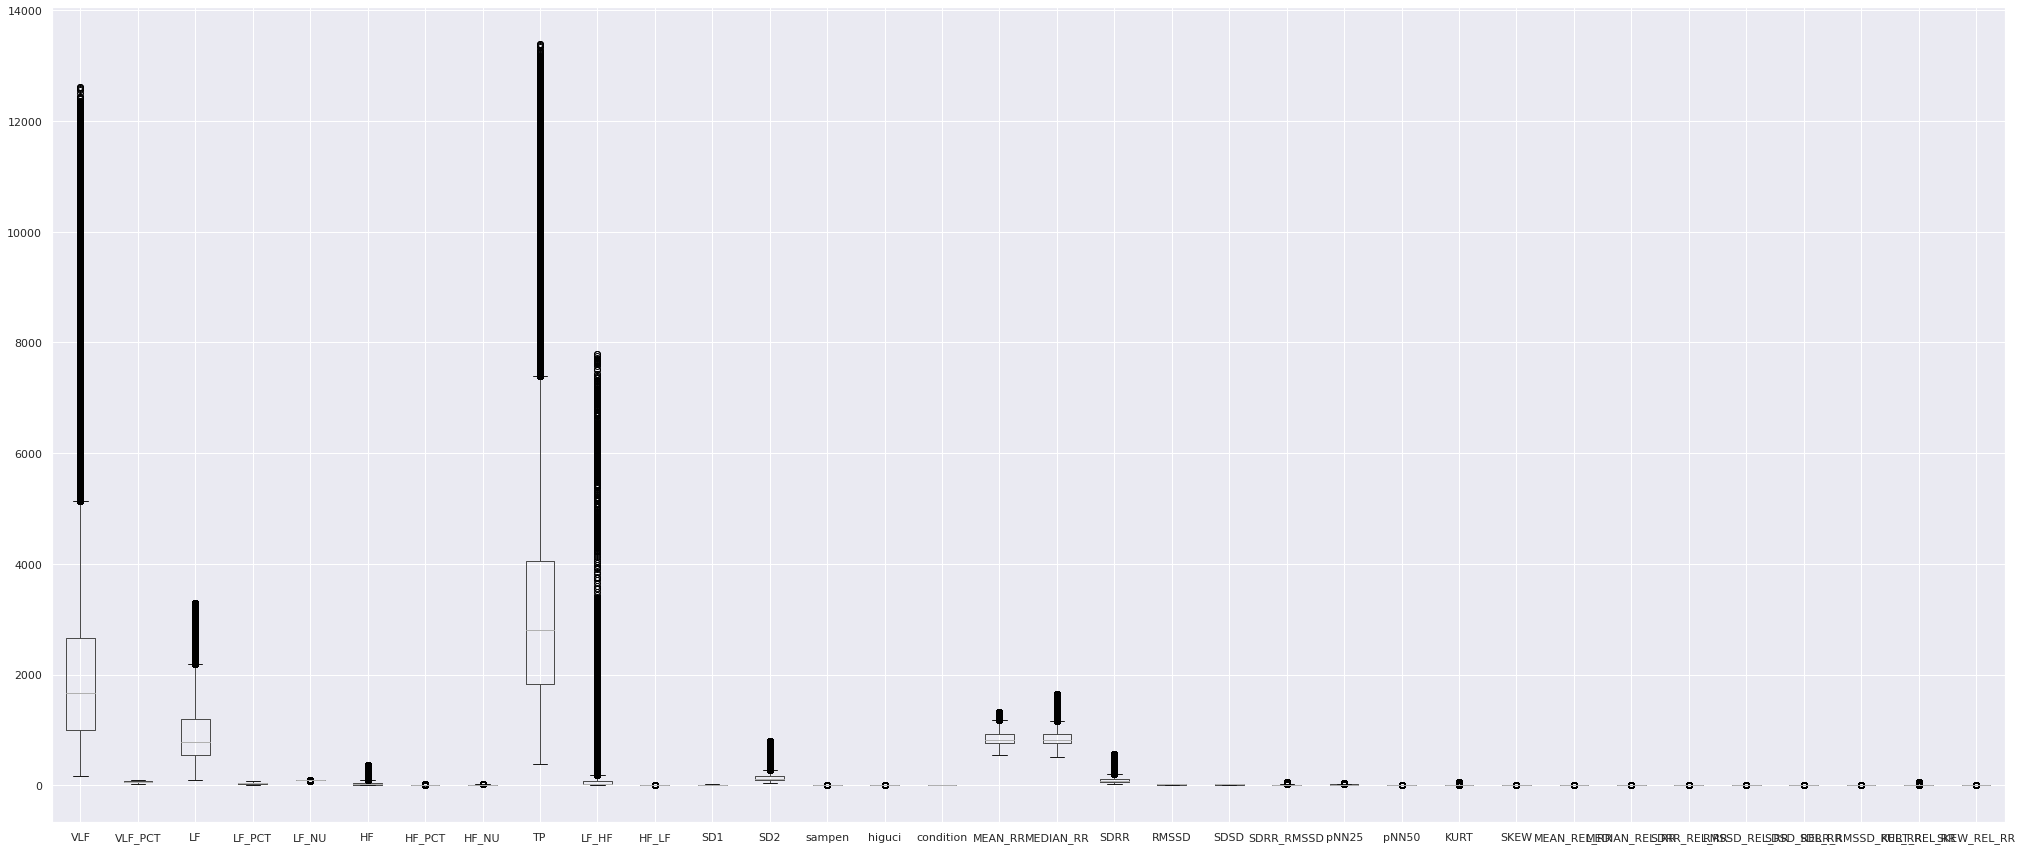

In [ ]:
train_df.iloc[:,:-1].boxplot(figsize=(35,15))

- Outlier - Datapoints lies outside upper boundary(Q3+1.5IQR) and lower boundary(Q1-1.5IQR) is called outliers. 
IQR = Q3-Q1

### Address Outliers with Floor at 1% and Capping at 99%¶

In [ ]:
#find the outliers and replace them Floor value of 1 Percentile and Capping value of 99 Percentile for all columns except Target
#for col_name in train_df.columns[:]:
for col_name in train_df.iloc[:, : -1]:
    q1 = train_df[col_name].quantile(0.25)
    q3 = train_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    #low = q1-1.5*iqr
    #high = q3+1.5*iqr
    
    new_low  = train_df[col_name].quantile(0.01)      
    new_high = train_df[col_name].quantile(0.99)
    
    train_df.loc[(train_df[col_name] < new_low),  col_name] = train_df[col_name].quantile(0.01)
    train_df.loc[(train_df[col_name] > new_high), col_name] = train_df[col_name].quantile(0.99)

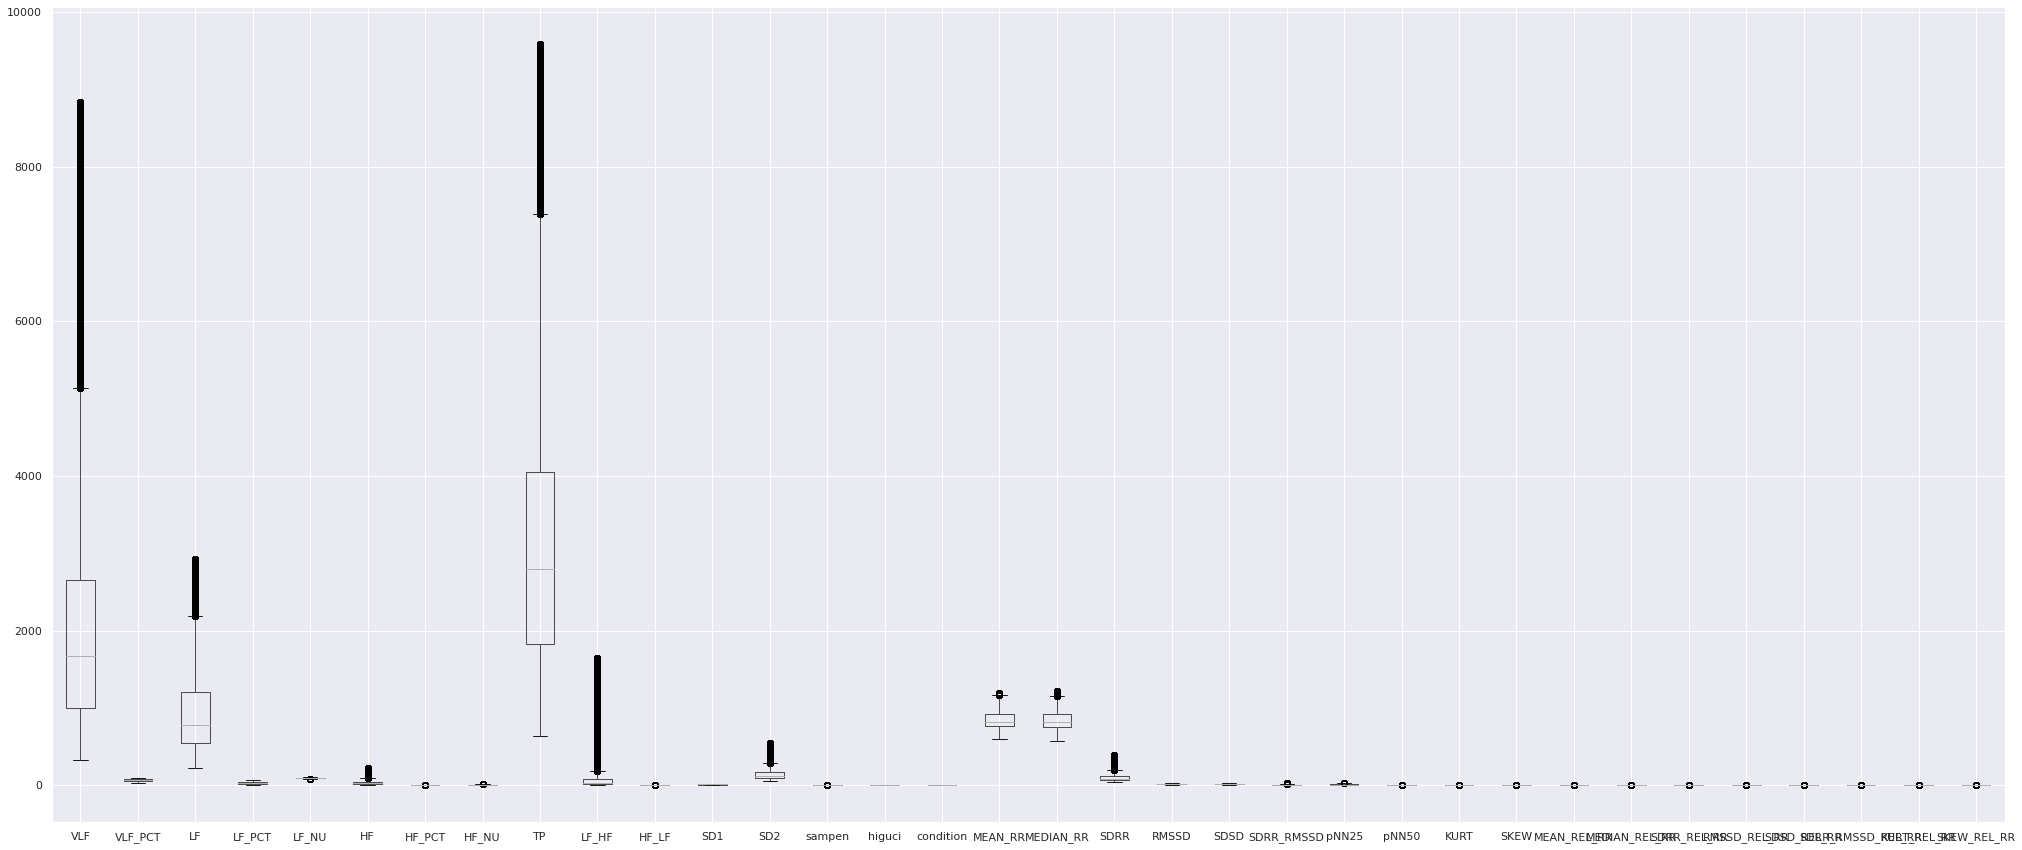

In [ ]:
train_df.iloc[:,:-1].boxplot(figsize=(35,15))

In [ ]:
print(f'Kurtosis of Concrete dataset \n{train_df.iloc[:, :-1].kurtosis()}')

Kurtosis of Concrete dataset 
VLF                   3.171418
VLF_PCT              -0.556084
LF                    1.476766
LF_PCT               -0.523522
LF_NU                 1.946780
HF                    4.586771
HF_PCT                3.103844
HF_NU                 1.946780
TP                    1.681395
LF_HF                25.490367
HF_LF                 3.338177
SD1                  -0.676799
SD2                   3.892558
sampen                7.323485
higuci               -0.364822
condition            -0.774849
MEAN_RR               0.127554
MEDIAN_RR             0.327161
SDRR                  3.894848
RMSSD                -0.677041
SDSD                 -0.676799
SDRR_RMSSD            5.206386
pNN25                 0.602831
pNN50                 0.617917
KURT                  7.033521
SKEW                  1.816017
MEAN_REL_RR           2.354820
MEDIAN_REL_RR         0.655423
SDRR_REL_RR           0.129103
RMSSD_REL_RR          0.845357
SDSD_REL_RR           0.845363
SDRR_RMSS

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

train_df.corr()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,HR
VLF,1.000000,0.684638,0.030261,-0.672467,0.115727,-0.016413,-0.406072,-0.115727,0.949259,0.178854,-0.106478,0.346411,0.828962,-0.307999,-0.575575,0.128435,0.508111,0.412712,0.828913,0.346580,0.346411,0.698237,0.199883,0.542126,-0.054678,0.242725,-0.031677,0.238506,0.243856,0.087431,0.087431,0.308905,-0.054678,0.242725,-0.310001
VLF_PCT,0.684638,1.000000,-0.539210,-0.995216,0.048981,-0.295905,-0.470869,-0.048981,0.472513,0.112399,-0.044688,-0.276177,0.588456,-0.404884,-0.550782,0.209150,0.386064,0.309042,0.586986,-0.276016,-0.276177,0.689315,-0.380514,0.005889,0.098420,0.230641,0.001165,0.590379,-0.342066,-0.338964,-0.338964,0.277164,0.098420,0.230641,-0.253837
LF,0.030261,-0.539210,1.000000,0.568108,0.256760,0.328320,-0.034821,-0.256760,0.341635,0.178177,-0.249061,0.886321,-0.005603,0.221756,0.033664,-0.202302,0.086934,0.102151,-0.003495,0.886265,0.886321,-0.283164,0.914401,0.666731,-0.158436,-0.075515,-0.022970,-0.553553,0.783767,0.532172,0.532171,0.082281,-0.158436,-0.075515,-0.099494
LF_PCT,-0.672467,-0.995216,0.568108,1.000000,0.041111,0.230549,0.383082,-0.041111,-0.453881,-0.082041,-0.045712,0.297001,-0.583849,0.424946,0.496095,-0.208684,-0.332608,-0.256138,-0.582348,0.296840,0.297001,-0.689637,0.405361,-0.003563,-0.115734,-0.241476,-0.003155,-0.604883,0.326522,0.294138,0.294138,-0.214213,-0.115734,-0.241476,0.193333
LF_NU,0.115727,0.048981,0.256760,0.041111,1.000000,-0.732800,-0.841603,-1.000000,0.169448,0.385904,-0.997864,0.197233,0.005791,0.320513,-0.582569,0.065263,0.644024,0.653057,0.006087,0.197211,0.197233,-0.044984,0.235163,-0.007580,-0.244115,-0.214524,-0.038273,-0.132025,-0.234625,-0.565880,-0.565880,0.778129,-0.244115,-0.214524,-0.728844
HF,-0.016413,-0.295905,0.328320,0.230549,-0.732800,1.000000,0.716365,0.732800,0.109476,-0.303281,0.736728,0.337811,0.057301,-0.188149,0.440532,-0.105178,-0.562246,-0.568625,0.058180,0.337810,0.337811,-0.056895,0.271944,0.415757,0.098145,0.195303,0.017048,-0.174381,0.741303,0.886041,0.886041,-0.597573,0.098145,0.195303,0.652111
HF_PCT,-0.406072,-0.470869,-0.034821,0.383082,-0.841603,0.716365,1.000000,0.841603,-0.374974,-0.331900,0.839592,-0.081445,-0.294125,-0.014407,0.737169,-0.095797,-0.661895,-0.624998,-0.293800,-0.081509,-0.081445,-0.289406,-0.067822,-0.033316,0.117774,0.012639,0.018374,-0.114485,0.281507,0.550504,0.550505,-0.701847,0.117774,0.012639,0.670143
HF_NU,-0.115727,-0.048981,-0.256760,-0.041111,-1.000000,0.732800,0.841603,1.000000,-0.169448,-0.385904,0.997864,-0.197233,-0.005791,-0.320513,0.582569,-0.065263,-0.644024,-0.653057,-0.006087,-0.197211,-0.197233,0.044984,-0.235163,0.007580,0.244115,0.214524,0.038273,0.132025,0.234625,0.565880,0.565880,-0.778129,0.244115,0.214524,0.728844
TP,0.949259,0.472513,0.341635,-0.453881,0.169448,0.109476,-0.374974,-0.169448,1.000000,0.215903,-0.158212,0.604533,0.779753,-0.225957,-0.520725,0.057945,0.491406,0.406406,0.780372,0.604675,0.604533,0.569582,0.473968,0.724087,-0.097670,0.210086,-0.036468,0.051066,0.486660,0.266360,0.266360,0.301475,-0.097670,0.210086,-0.306428
LF_HF,0.178854,0.112399,0.178177,-0.082041,0.385904,-0.303281,-0.331900,-0.385904,0.215903,1.000000,-0.363524,0.259950,0.040007,0.151598,-0.314640,0.022254,0.559975,0.560413,0.040330,0.259928,0.259950,-0.048082,0.285760,0.137749,-0.117823,-0.113713,0.003533,-0.092274,-0.061825,-0.249122,-0.249123,0.534467,-0.117823,-0.113713,-0.520887


## Feature Engineering

### Scale the features

In [ ]:
train_df.shape

(369289, 35)

In [ ]:
X = train_df.iloc[:, 0:34]
y = train_df.iloc[:,-1]

In [ ]:
print ("X ", X.shape, ",y ", y.shape)

X  (369289, 34) ,y  (369289,)


In [ ]:
y.head()

0    69.499952
1    64.363150
2    67.450066
3    68.809562
4    74.565728
Name: HR, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((258502, 34), (110787, 34), (258502,), (110787,))

In [ ]:
# scale the features

scaler = StandardScaler()

scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.0282733 ,  0.44774245, -0.14624053, ...,  0.29856333,
        -0.65894393,  0.1757864 ],
       [-1.00647952, -1.64787329, -0.45061729, ...,  0.31348181,
        -0.32093911, -0.38012525],
       [-0.25832777,  0.4176314 , -0.46689195, ...,  0.07427388,
        -0.18251144,  0.12094304],
       ...,
       [-0.59529192, -1.40184512,  1.15755177, ..., -0.39705084,
        -0.20377584, -0.3149613 ],
       [-0.12090687, -0.13803326, -0.03375706, ..., -1.64249955,
        -1.03131133,  0.04379211],
       [ 3.6695069 ,  1.83677925, -1.17675365, ...,  2.87500615,
        -0.93478271, -0.11091353]])

### LASSO Regression to drop features that are not importance

In [ ]:
regression_model_lasso = Lasso(alpha=1.0)
reg = regression_model_lasso.fit(X_train,y_train)
print ("Lasso model:", (regression_model_lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.00024003 -0.01534123 -0.00119949  0.         -0.          0.01384432
  0.          0.          0.00018832  0.00509307  0.         -0.
  0.03160676 -0.         -0.          0.         -0.09851958  0.00566547
  0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.        ]


### PCA - Identify opportunities to create Composite Features

[0.26490189 0.51931541 0.71058976 0.78085733 0.82053187 0.85114023
 0.87938485 0.90624757 0.93091918 0.94834233 0.96156958 0.97125784
 0.97766429 0.9836941  0.98921998 0.99235595 0.99475931 0.99636485
 0.99757495 0.99846443 0.99911635 0.99947647 0.99977391 0.99995253
 0.99999346 0.99999848 0.99999999 1.         1.         1.
 1.         1.         1.         1.        ]


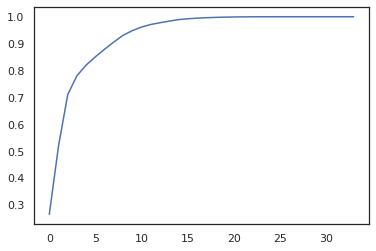

In [ ]:
pca = PCA().fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

Let's pick 21 Principle components as the first 21 capture more than 99.90% of the variance in the data

## Modeling

### DecisionTree Regression without pruning (depth = none) and check Feature Importance

### XGBOOST

In [ ]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
xg_scaled_r2_train = xg_reg.score(X_train, y_train)

preds = xg_reg.predict(X_test)
xg_scaled_r2_test = xg_reg.score(X_test, y_test)

print("XGBOOST Model Train score   = ", xg_scaled_r2_train)
print("XGBOOST Model Test score    = ", xg_scaled_r2_test)
#print(xg_scaled_r2_train, xg_scaled_r2_test)


mae_xg = mean_absolute_error(y_test, preds)
print("XGBOOST MAE value : %f" % (mae_xg))

[17:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST Model Train score   =  0.9972373116224473
XGBOOST Model Test score    =  0.9972187707965137
XGBOOST MAE value : 0.365815


## Prepare the user acceptance data for testing

In [ ]:
print("Test Data  = ", test_df.shape) 

Test Data  =  (41033, 36)


In [ ]:
test_df = test_df.drop(columns = ['datasetId']) 
test_df.shape

(41033, 35)

In [ ]:
test_df['condition']=test_df['condition'].astype('category')

test_df['condition'].unique()

test_df.groupby('condition').size()

condition
interruption     11782
no stress        22158
time pressure     7093
dtype: int64

In [ ]:
class_label_encoder = LabelEncoder()
test_df['condition'] = class_label_encoder.fit_transform(test_df['condition'])
test_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,1,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,0,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082


In [ ]:
X.shape

(369289, 34)

In [ ]:
test_df1 = test_df.drop(columns = ['uuid']) 
test_df1.shape

(41033, 34)

In [ ]:
scaler.transform(test_df1)

array([[-0.18198278,  0.73142631, -0.66035951, ...,  2.20518453,
        -0.77574576, -0.40380369],
       [-0.91707059, -2.27452197,  1.06995266, ..., -0.53790863,
        -0.34749496, -0.13607227],
       [-0.0500194 ,  0.69103187, -0.51161156, ..., -0.26949358,
        -0.46188305, -0.9305511 ],
       ...,
       [-0.24217366, -1.0140307 ,  1.76887323, ...,  0.18597382,
         0.32064231, -1.0654015 ],
       [-1.05904484, -0.40937474, -1.28670251, ..., -1.12548882,
         1.84984212, -2.35229677],
       [-0.27388175,  0.34063525, -0.46412916, ..., -1.16749436,
         0.27809199,  0.66680288]])

In [ ]:
y_predict_data = xg_reg.predict(test_df1)

In [ ]:
y_predict_data.shape

(41033,)

In [ ]:
y_predict = pd.DataFrame(y_predict_data, columns=['HR'])

In [ ]:
y_predict.shape

(41033, 1)

In [ ]:
y_predict.head()

,HR
0,64.920242
1,73.776749
2,68.960846
3,61.210533
4,77.641937


In [ ]:
result = pd.concat([test_df, y_predict], axis=1, sort=False)

In [ ]:
result.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,64.920242
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,73.776749
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,1,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,68.960846
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,61.210533
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,0,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,77.641937


In [ ]:
result.to_excel(r'/content/drive/My Drive/AIML/Hackathon/result1.xlsx', index = False)

In [ ]:
result.to_csv(r'/content/drive/My Drive/AIML/Hackathon/result1.csv', index = False)